# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists
import torch

In [2]:
# pip install Pillow==9.4.0

In [3]:
from PIL import __version__
print(__version__)

11.2.1


In [4]:
! pip install torchvision==0.2.0

Reason for being yanked: So that users won't accidentally install this when using python 3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

O MNIST é um banco de dados famoso contendo imagens de dígitos manuscritos (de 0 a 9). Cada uma dessas imagens:

- É em preto e branco (escala de cinza).

- Tem resolução de 28×28 pixels.

- Cada pixel tem um valor entre 0 e 255, indicando o nível de cinza (0 = preto, 255 = branco, valores intermediários = tons de cinza).

In [6]:
#Clonar o repositório no Github

! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 12.08 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [7]:
#Obtenção dos dados de entrada (X_train) e saída (Y_train)

dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


In [8]:
# 60000 imagens de 28x28 pixels
x_train.shape

torch.Size([60000, 28, 28])

### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [9]:
x_train = x_train.float()

x_train = x_train / 255. # Normalizar os dados entre 0 e 1

if True:
    n_samples_train = 1000 # Número de amostras que serão utilizadas

    x_train = x_train[:n_samples_train] #Filtrar as n amostras dos dados de entrada
    y_train = y_train[:n_samples_train] #Filtrar as n amostras dos dados de saída

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(116.5), np.float64(-0.5))

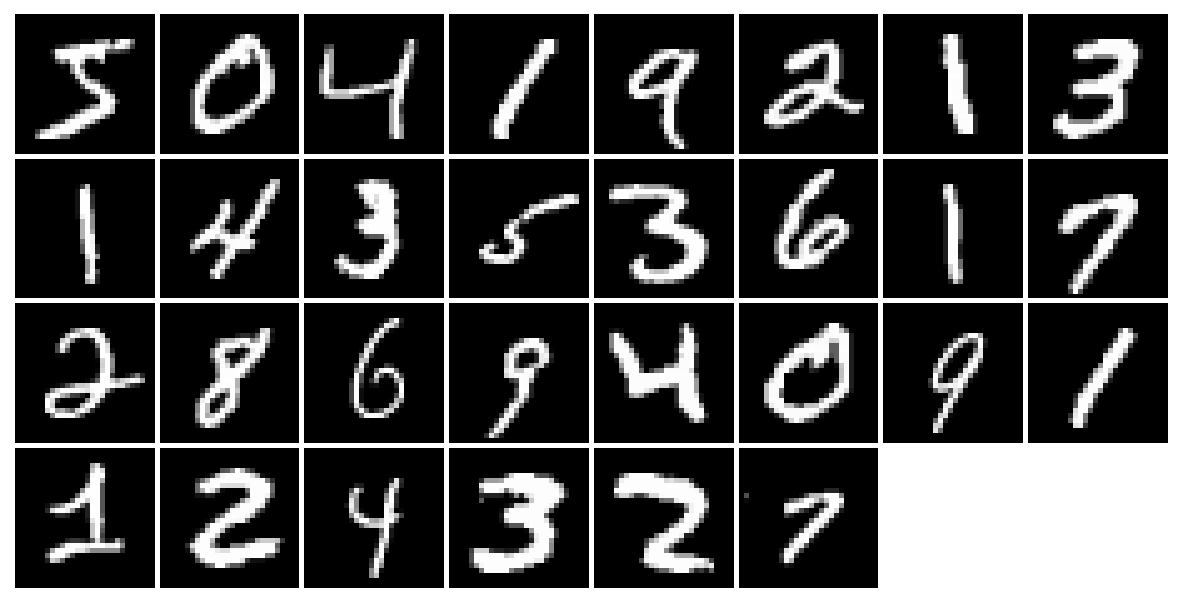

In [10]:
#Visualizando as 30 primeiras amostras

n_samples = 30

# cria um grid com as imagens
#unsqueeze(dim=1) adiciona um canla de cor à imagem (cinza = 1 canal)
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0)) #grid.numpy converter o tensor Pytorch para array numpy
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


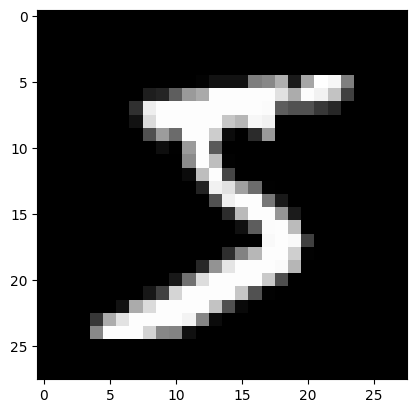

In [11]:
#Visualização da imagem

image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [12]:
#Formatação numérica da Imagem

x_train[0] #1 imagem de 28x28 pixels


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

class: tensor(5)


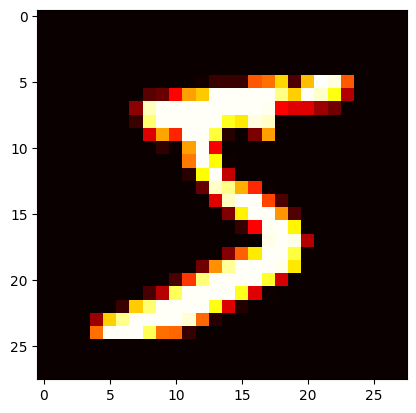

class: tensor(0)


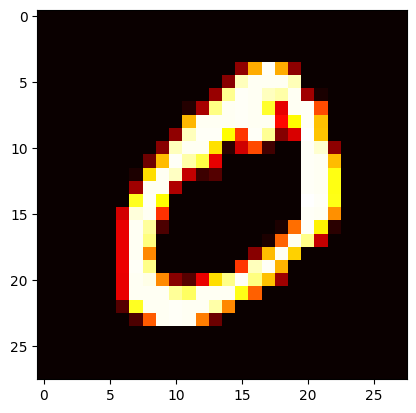

class: tensor(4)


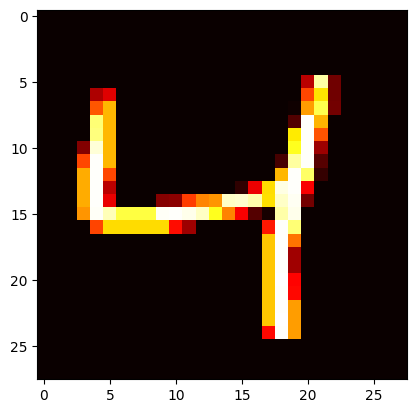

class: tensor(1)


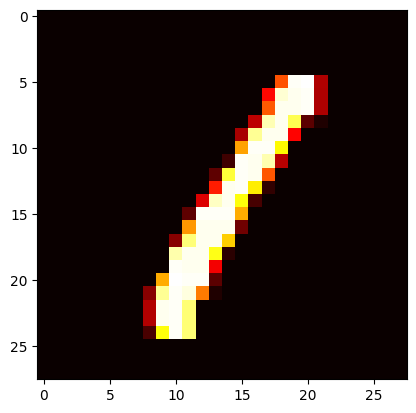

class: tensor(9)


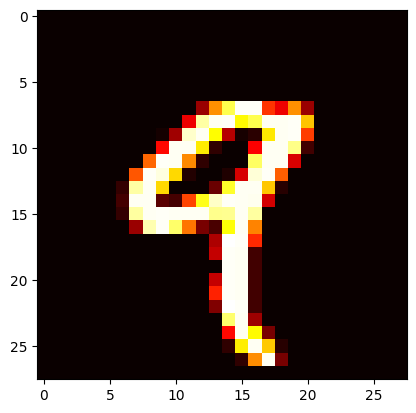

class: tensor(2)


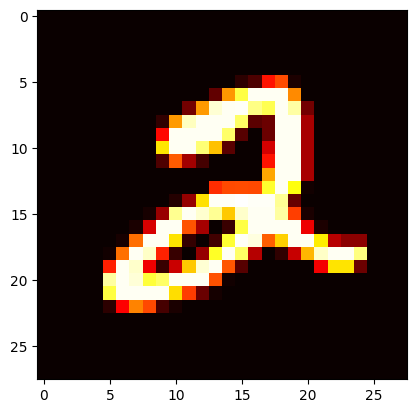

class: tensor(1)


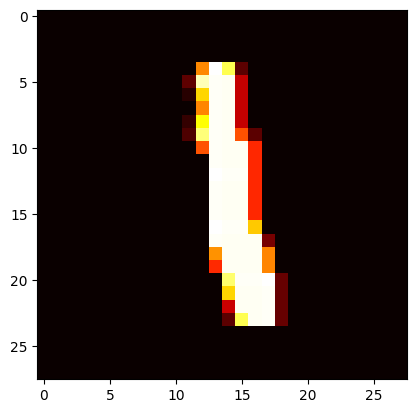

class: tensor(3)


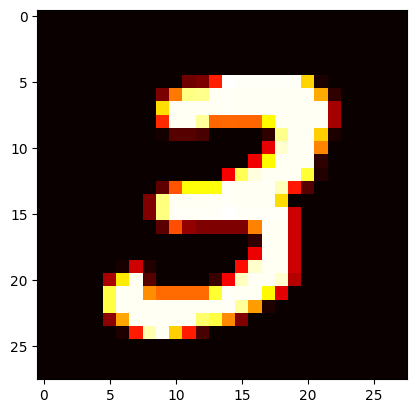

class: tensor(1)


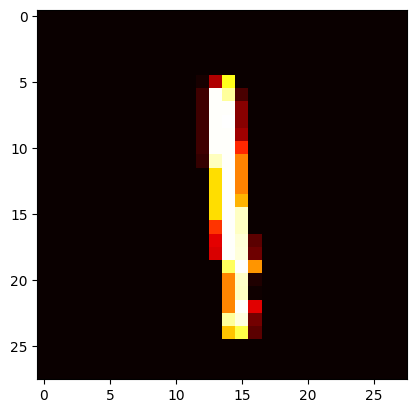

class: tensor(4)


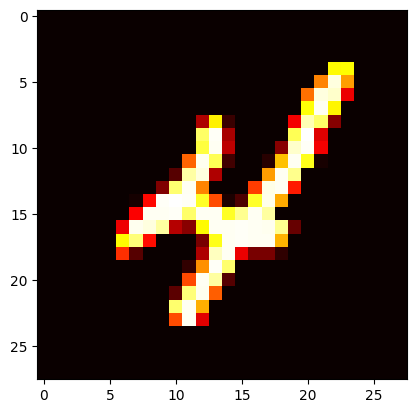

In [13]:
#Outra forma de visualizar as imagens

for i in range(0,10):
  imagem = x_train[i]
  plt.imshow(imagem.numpy(), cmap='hot') #Transformar de Tensor para array numpy para visualizar com Matplotlib
  print('class:', y_train[i])
  plt.show()


## Modelo

In [14]:
# Rede Linear com 28*28 (784) variáveis de entrada e 10 variáveis de sáida
model = torch.nn.Linear(28*28, 10)

In [15]:
x_train.shape

torch.Size([1000, 28, 28])

### Testando um predict com poucas amostras

In [16]:
#Pesos inicializados no modelo

model.weight.data.shape

torch.Size([10, 784])

In [17]:
#Bias inicializados no modelo

model.bias.data.shape

torch.Size([10])

In [18]:
# Transforma o shape de x_train[:5] de [5x 28 x 28] para [5 x 784]

xin = x_train[:5].view(-1,28*28)


In [19]:
print(x_train[0].shape)
x_train[0]

torch.Size([28, 28])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [20]:
print(xin[0].shape)
xin[0]

torch.Size([784])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
#Predição sem treinamento, com os valores de pesos e bias inicializados na rede
#5 linhas (5 instâncias) com 10 colunas cada (saídas do modelo)
out = model(Variable(xin))
out

tensor([[ 0.3016,  0.4326, -0.0413,  0.1672,  0.1177, -0.3463, -0.3605,  0.0665,
          0.2394, -0.3673],
        [ 0.3133,  0.4423, -0.1599,  0.1813,  0.0713, -0.0706, -0.5644, -0.0577,
         -0.1239, -0.3478],
        [-0.0428,  0.0794,  0.0716,  0.1695, -0.1141, -0.3841, -0.1532, -0.1999,
          0.0487,  0.0582],
        [ 0.1839,  0.1918,  0.0556,  0.1203, -0.1377, -0.0192, -0.1260,  0.1509,
          0.1652, -0.1935],
        [ 0.3489,  0.3388, -0.3405,  0.1143,  0.1159, -0.0097, -0.1765, -0.1717,
          0.1596, -0.1154]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [22]:
epochs = 5 # Número de épocas
learningRate = 0.5 # Taxa de aprendizado

# Utilizaremos CrossEntropyLoss como função de perda
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [23]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-wcwq4zhx
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-wcwq4zhx
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=3a25fc0706c25b48031384a19ba4a7a01abf4ea844e5e8584a5527af883e0bb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ql1sxf5h/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


loss 2.3261373043060303


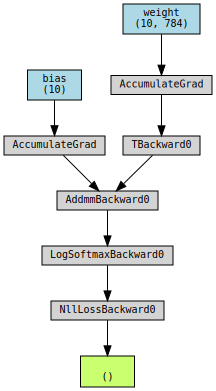

In [24]:
#Perda inicial

# Grafo computacional

from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
print(f'loss {loss}')
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch[1/5], loss geral: 2.326137, acc geral: 0.133000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


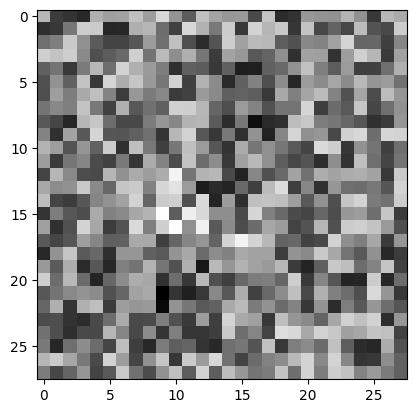

Epoch[2/5], loss geral: 1.809664, acc geral: 0.664000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


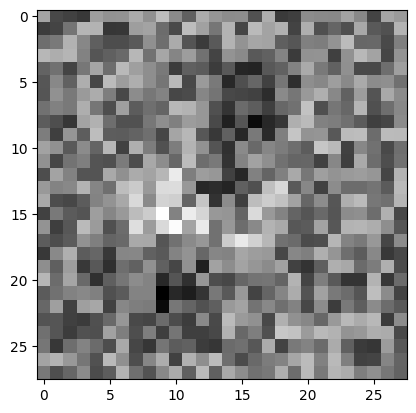

Epoch[3/5], loss geral: 1.465875, acc geral: 0.728000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


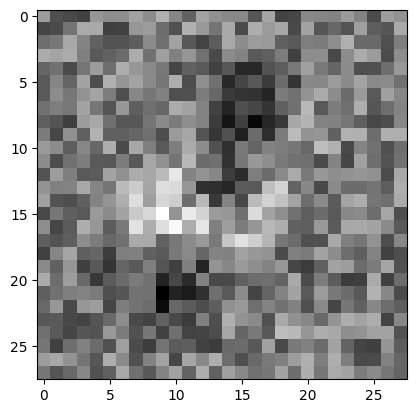

Epoch[4/5], loss geral: 1.245584, acc geral: 0.791000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


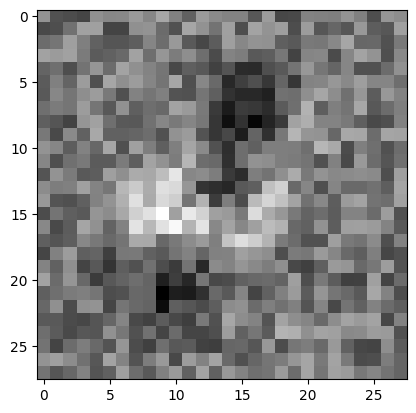

Epoch[5/5], loss geral: 1.095955, acc geral: 0.792000
weights: torch.Size([10, 784])
bias:    torch.Size([10])
Pesos da classe 4


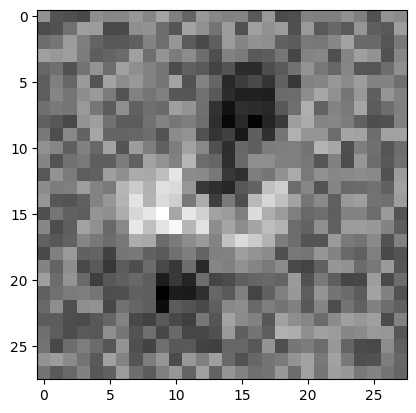

In [25]:
losses = [] #Lista para armazenar os valores de perdas
import numpy
zs = [] #Lista das saídas da rede

for i in range(epochs):
    # Transforma a entrada para uma dimensão [28 x 28] para [784]
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs) #ypred = x . wT ---> formato (1000,10)  -- probabilidades para cada valor de 0 a 9 dentre para cada uam das 1000 instâncias

    # z0 a z9 (Adicionar as probabilidades preditas em cada época em uma lista)

    zs.append(outputs.detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    #Valor de saída com maior probabilidade
    _, predicts = torch.max(outputs, 1)

    #Cálculo da acurácia (Predições corretas)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss geral: {:.6f}, acc geral: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 4
    print('Pesos da classe 4')
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

In [26]:
zs

[array([[ 0.30155322,  0.4326492 , -0.0413275 , ...,  0.06648374,
          0.23935789, -0.36725757],
        [ 0.31331208,  0.44229174, -0.15988956, ..., -0.0577255 ,
         -0.12385955, -0.34780273],
        [-0.04279165,  0.07938337,  0.07158461, ..., -0.19989257,
          0.04867019,  0.0582338 ],
        ...,
        [ 0.2377904 ,  0.02721531, -0.12642768, ..., -0.16110379,
         -0.01143289, -0.38559994],
        [-0.04760331,  0.24698469,  0.32531437, ..., -0.02466085,
          0.0916184 , -0.04975796],
        [ 0.12435279,  0.24270366,  0.05876586, ..., -0.09294982,
          0.2596139 , -0.52299756]], dtype=float32),
 array([[ 0.23465079, -0.5756845 , -0.01843728, ...,  0.45596763,
          0.05969384, -0.02585484],
        [ 1.3752794 , -0.9461684 , -0.10874887, ...,  0.20131233,
         -0.48172885, -0.15261072],
        [-0.10788825, -0.7885082 ,  0.27166417, ..., -0.05754291,
         -0.2162545 ,  0.30243495],
        ...,
        [ 0.78207177, -1.2877338 ,  0.1

In [27]:
#100 valores. Número de épocas
len(zs)

5

In [28]:
#1000 valores (1 para cada amostra)
print(len(zs[0]))
zs[0]

1000


array([[ 0.30155322,  0.4326492 , -0.0413275 , ...,  0.06648374,
         0.23935789, -0.36725757],
       [ 0.31331208,  0.44229174, -0.15988956, ..., -0.0577255 ,
        -0.12385955, -0.34780273],
       [-0.04279165,  0.07938337,  0.07158461, ..., -0.19989257,
         0.04867019,  0.0582338 ],
       ...,
       [ 0.2377904 ,  0.02721531, -0.12642768, ..., -0.16110379,
        -0.01143289, -0.38559994],
       [-0.04760331,  0.24698469,  0.32531437, ..., -0.02466085,
         0.0916184 , -0.04975796],
       [ 0.12435279,  0.24270366,  0.05876586, ..., -0.09294982,
         0.2596139 , -0.52299756]], dtype=float32)

In [29]:
#10 valores (0 a 9)
print(len(zs[0][0]))
zs[0][0]

10


array([ 0.30155322,  0.4326492 , -0.0413275 ,  0.1671851 ,  0.11771049,
       -0.34628677, -0.36047158,  0.06648374,  0.23935789, -0.36725757],
      dtype=float32)

In [30]:
print(y_pred) #Valores preditos

tensor([3, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 2, 3, 6, 1, 7, 2, 8, 6, 7, 4, 0, 9, 1,
        6, 2, 9, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        3, 3, 3, 0, 7, 1, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 8, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 1, 1, 1, 7, 0, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 6, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        7, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 3, 9, 3, 3, 3, 1, 0, 4, 7, 7, 4, 2,
        3, 4, 8, 6, 7, 3, 1, 6, 1, 9, 7, 6, 0, 3, 4, 2, 3, 3, 9, 4, 4, 6, 4, 9,
        1, 0, 9, 2, 7, 1, 1, 8, 9, 1, 0, 3, 1, 7, 3, 9, 1, 7, 6, 2, 4, 2, 2, 4,
        0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 7, 1, 0, 0, 1, 9, 2, 7, 3,
        0, 4, 6, 5, 2, 6, 4, 7, 7, 8, 9, 9, 9, 0, 7, 1, 6, 2, 0, 3, 5, 4, 6, 5,
        1, 6, 3, 7, 3, 8, 0, 9, 1, 0, 7, 1, 1, 2, 3, 3, 1, 4, 7, 5, 0, 6, 0, 7,
        4, 8, 3, 9, 7, 1, 1, 4, 4, 5, 8, 4, 1, 2, 6, 3, 9, 3, 7, 0, 3, 9, 6, 5,
        7, 4, 1, 3, 6, 0, 4, 8, 0, 4, 3,

In [31]:
x_train.view(-1, 28 * 28).shape


torch.Size([1000, 784])

In [32]:
weights.data.shape

torch.Size([10, 784])

ypred = x_train.view . wT

x_train = (1000,784)

wT = (784,10)

ypred = (1000,784) x (1000,10)

ypred = (1000 , 10) -- 10 probabilidades (0 a 9) para cada instância

In [33]:
print('Final loss:', loss.item())

Final loss: 1.0959553718566895


##### ypred

In [34]:
#Valores preditos com os parametros ajustados após 100 épocas
output = model(x_train.view(-1,28*28))
output

tensor([[-2.6266e-02, -5.2036e-01, -2.5569e-01,  ...,  2.9268e-01,
          4.2918e-01, -3.1698e-01],
        [ 3.3796e+00, -1.4292e+00, -3.1518e-01,  ..., -2.3967e-01,
         -4.1885e-01, -7.5913e-01],
        [-3.2878e-01, -1.5187e+00,  5.7355e-01,  ..., -3.7077e-01,
         -4.5301e-01,  3.0134e-01],
        ...,
        [ 1.9219e+00, -1.7062e+00,  5.8503e-01,  ..., -6.2862e-02,
         -9.7587e-01, -6.4289e-01],
        [ 9.3069e-01, -2.2464e-01,  9.7765e-01,  ..., -5.2343e-01,
          3.1485e-03, -1.1481e+00],
        [-9.4955e-01,  3.8823e-01,  8.5653e-01,  ..., -7.1367e-01,
         -3.1623e-01, -6.2672e-01]], grad_fn=<AddmmBackward0>)

In [35]:
print(output[0]) #Primeiro número predito
print(torch.max(output,1)[0][0]) # Valor resultante da regressão logística
print(torch.max(output,1)[1][0]) #Número predito (Maior probabilidade)

tensor([-0.0263, -0.5204, -0.2557,  1.2843, -1.4193,  1.2019, -0.4600,  0.2927,
         0.4292, -0.3170], grad_fn=<SelectBackward0>)
tensor(1.2843, grad_fn=<SelectBackward0>)
tensor(3)


In [36]:
print(output[20])
print(torch.max(output,1)[0][20])
print(torch.max(output,1)[1][20])

tensor([-0.9075, -1.3929,  0.7106, -0.0050,  2.1752, -0.6518, -0.0572, -0.5560,
        -0.7456,  0.7695], grad_fn=<SelectBackward0>)
tensor(2.1752, grad_fn=<SelectBackward0>)
tensor(4)


### Visualizando gráfico de perda durante o treinamento

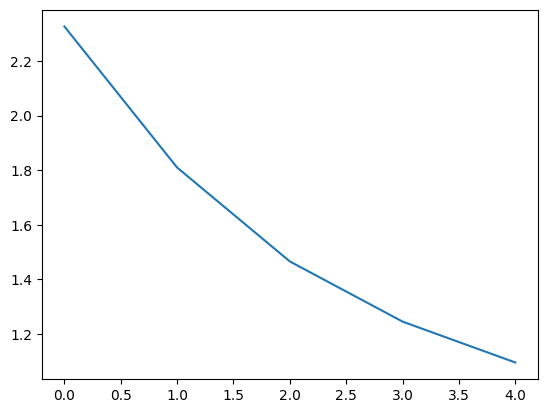

In [37]:
#Gráfico da perda (loss) ao longo das épocas
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [38]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.822


              precision    recall  f1-score   support

           0       0.90      0.95      0.92        97
           1       0.76      0.94      0.84       116
           2       0.85      0.75      0.80        99
           3       0.76      0.85      0.80        93
           4       0.84      0.83      0.84       105
           5       0.93      0.58      0.71        92
           6       0.84      0.89      0.87        94
           7       0.83      0.87      0.85       117
           8       0.81      0.75      0.78        87
           9       0.77      0.77      0.77       100

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



<Figure size 1600x1200 with 0 Axes>

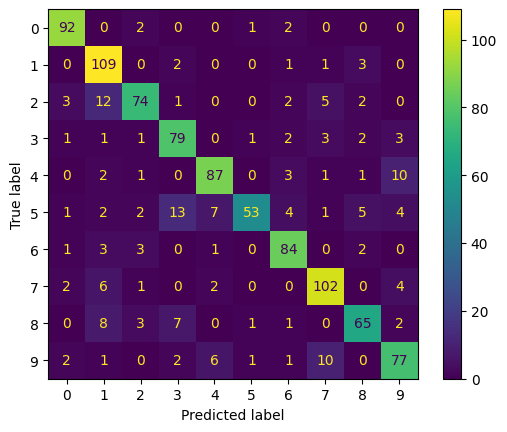

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_train, y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
cmd.plot()

plt.show()

## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


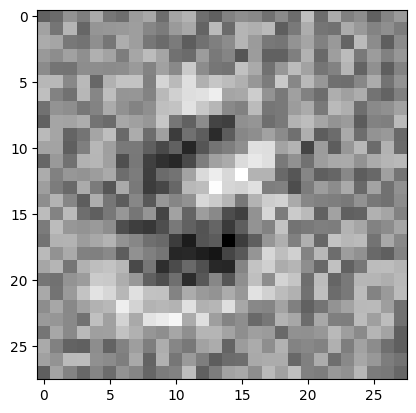

In [40]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 6
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

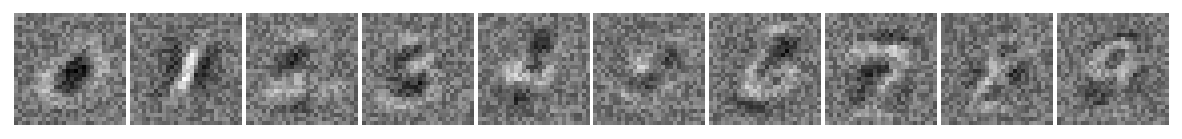

In [41]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

**Insirido no código**

- 1) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

**Inserido no código**

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
**28x28 (784 pixels)**
2. Qual é o shape da saída da rede?
**10 (valores de 0 a 9)**
3. Qual é o número total de parâmetros da rede, incluindo o bias?
**(28 x 28 x 10) + 10 = 7850**

*torch.nn.Linear(28 x 28,10)*

# Aprendizados



**Regressao Logística**
A regressão logística estima a probabilidade de ocorrência de um evento, como voto ou não voto, com base em um determinado conjunto de dados de variáveis independentes.

Esse tipo de modelo estatístico (também conhecido como modelo logit) frequentemente é usado para classificação e análise preditiva de dados. Como o resultado é uma probabilidade, a variável dependente é limitada entre 0 e 1


**Cross Entropy Loss**

A entropia cruzada, também conhecida como perda logarítmica ou perda de log, é uma função de perda popular usada no aprendizado de máquina para medir o desempenho de um modelo de classificação.
A entropia cruzada mede a diferença entre a distribuição de probabilidade descoberta de um modelo de classificação e os valores previstos.

**Matriz de Confusão**
A matriz de confusão ajuda a avaliar o desempenho do modelo de classificação no aprendizado de máquina comparando os valores previstos com os valores reais de um conjunto de dados.

Uma matriz de confusão (ou matriz de erro) é um método de visualização para resultados de algoritmo classificador. Mais especificamente, é uma tabela que decompõe o número de instâncias da verdade fundamental de uma classe específica em relação ao número de instâncias de classes previstas.

#Conceitos fundamentais

**Redes Neurais:**: Uma rede neural é um programa, ou modelo, de aprendizado de máquina que toma decisões de uma forma semelhante ao cérebro humano, utilizando processos que imitam a maneira como os neurônios biológicos trabalham juntos para identificar fenômenos, ponderar opções e chegar a conclusões.

Toda rede neural é composta por camadas de nós, ou neurônios artificiais: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó se conecta a outros e possui seu próprio peso e limiar associados

**Gradiente Descendente:**O gradiente descendente é um algoritmo de otimização comumente usado para treinar modelos de aprendizado de máquina e redes neurais. Ele treina modelos de aprendizado de máquina ao minimizar os erros entre os resultados previstos e os reais.

Os conceitos de Redes Neurais e gradientes descendentes foram utilizados nesse projeto para realizar um algoritmo de regressão linear com base nos dados Iris.


**Etapas do Laço de treinamento:**
- Predição dos valores com base nos dados de entrada (X)

- Cálculo da função perda. MSE foi usada no projeto.
  
  Perda de entropia cruzada / binária poderia ser usada para modelos de classificação.

- Cálculo do gradiente (utilizando a função perda e o learning rate)

- Atualização dos pesos iniciais usando o gradiente calculado

**Learning rate:** Taxa de aprendizagem. Parâmetro fundamental para o cálculo o gradiente descendente. Pequenos valores de Learning rate podem levar a um aprendizado mais lenta (mais épocas necessárias), grandes valores podem levar a um treinamento instável com dificuldade para convergir para a melhor solução
